In [1]:
import os

# Define the target directory
target_directory = r"C:\Users\pablosal\Desktop\gbbai-azure-ai-document-intelligence"  # change your directory here

# Check if the directory exists
if os.path.exists(target_directory):
    # Change the current working directory
    os.chdir(target_directory)
    print(f"Directory changed to {os.getcwd()}")
else:
    print(f"Directory {target_directory} does not exist.")

Directory changed to C:\Users\pablosal\Desktop\gbbai-azure-ai-document-intelligence


In [2]:
from src.ocr.transformer import GPT4VisionManager

gpt_vision_client = GPT4VisionManager()
gpt_vision_client.load_environment_variables_from_env_file()

In [6]:
sys_message = "You are an AI assistant capable of processing and summarizing complex documents with diagrams, tables, and multiple images."
user_prompt = """
Please analyze the documents passed and provide the information in the following format:

1. Summary: Provide a combined summary of the documents, focusing on the main points and overall context. If multiple images or sections of a PDF are passed, integrate the summaries to provide a comprehensive overview.

2. Terminology: Highlight key terminology used in the documents and provide brief explanations of what they mean or do within the context of the documents.

3. Content: Your task is to extract all information from the documents in a detailed and granular manner. Pay special attention to tables, diagrams, and images. Ensure that no information is omitted. Avoid summarizing; instead, be explicit with all the details and cells. Take your time, as the purpose is to thoroughly record all the information from the documents.

4. Keywords: List up to 20 key categories or keywords, with a focus on main products or concepts mentioned in the documents. Keywords should be abstracted and listed, separated by commas.

The purpose is to enable another system to read and understand this information in detail, to facilitate answering precise questions based on the documents' context.

Please return the information in the following format:

#summary
<summary text>

#terminology
<terminology text>

#content
<content text>

#keywords
[<keyword 1>, <keyword 2>, <keyword 3>, ... up to 20 keywords]
"""

In [7]:
image_file_paths = [
    "C:\\Users\\pablosal\\Desktop\\gbbai-azure-ai-document-intelligence\\notebooks\\dev\\images\\instruction-manual-fieldvue-dvc6200-hw2-digital-valve-controller-en-123052-page-33.png",
    "C:\\Users\\pablosal\\Desktop\\gbbai-azure-ai-document-intelligence\\notebooks\\dev\\images\\instruction-manual-fisher-ewd-ews-ewt-valves-through-nps-12x8-en-124788-page-14.png",
    "C:\\Users\\pablosal\\Desktop\\gbbai-azure-ai-document-intelligence\\utils\\images\\double_arrangements.png",
]

2024-01-20 13:52:47,669 - micro - MainProcess - INFO     Preparing instruction for GPT-4 Vision API call. (transformer.py:prepare_instruction:119)
2024-01-20 13:52:47,671 - micro - MainProcess - INFO     Instruction: [{'role': 'system', 'content': [{'type': 'text', 'text': 'You are an AI assistant capable of processing and summarizing complex documents with diagrams, tables, and multiple images.'}]}, {'role': 'user', 'content': [{'type': 'text', 'text': "\nPlease analyze the documents passed and provide the information in the following format:\n\n1. Summary: Provide a combined summary of the documents, focusing on the main points and overall context. If multiple images or sections of a PDF are passed, integrate the summaries to provide a comprehensive overview.\n\n2. Terminology: Highlight key terminology used in the documents and provide brief explanations of what they mean or do within the context of the documents.\n\n3. Content: Your task is to extract all information from the docum

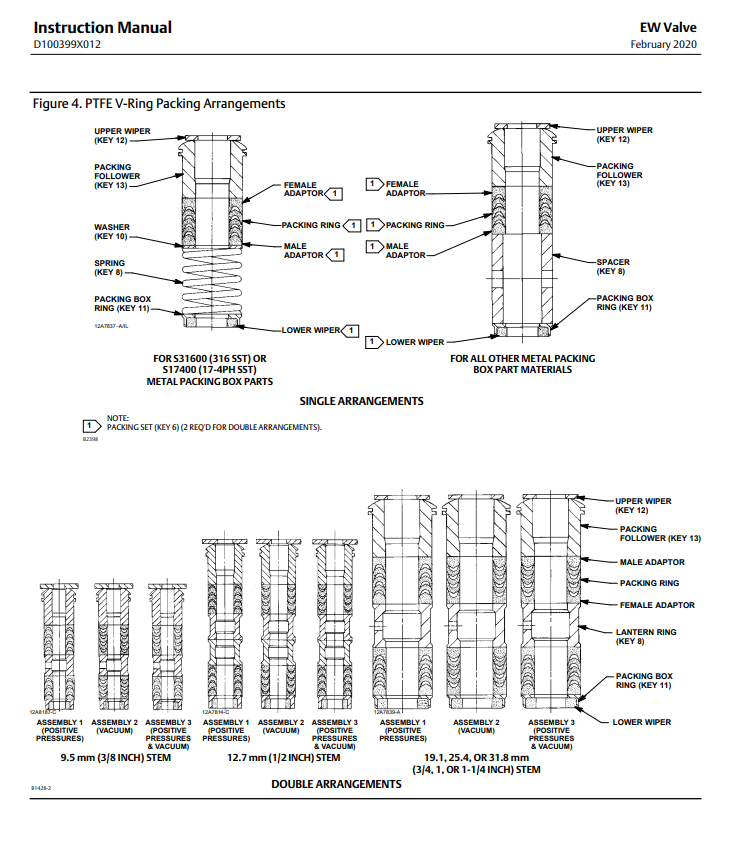

#summary
The documents are excerpts from instruction manuals for different types of valves. The first document outlines the process for setting the partial stroke Outgoing Pressure Threshold in valves, which is determined by the relay type and involves examining current partial stroke test results using ValveLink software. It includes a table (Table 3-7) of estimated outgoing partial stroke pressure limits based on actuator style and relay type. The second document provides safety warnings for trim maintenance on valves to avoid personal injury or property damage, with guidelines for body-to-bonnet bolt torque and recommended torque for packing flange nuts in various valve sizes and pressure ratings. The third document contains diagrams illustrating PTFE V-ring packing arrangements for different valve stem pressures, materials, and sizes. It highlights single and double arrangements for different valve stem diameters.

#terminology
- Outgoing Pressure Threshold: A predetermined pressur

In [8]:
ocr_recognizer_1 = gpt_vision_client.call_gpt4v_image(
    image_file_paths,
    system_instruction=sys_message,
    user_instruction=user_prompt,
    ocr=True,
    use_vision_api=True,
    display_image=True,
    max_tokens=2000,
    seed=42,
)
print(ocr_recognizer_1)